Data1 Shape: (5000, 8)
Data1 Columns and DataTypes: ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

Data2 Shape: (5000, 7)
Data2 Columns and DataTypes: ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


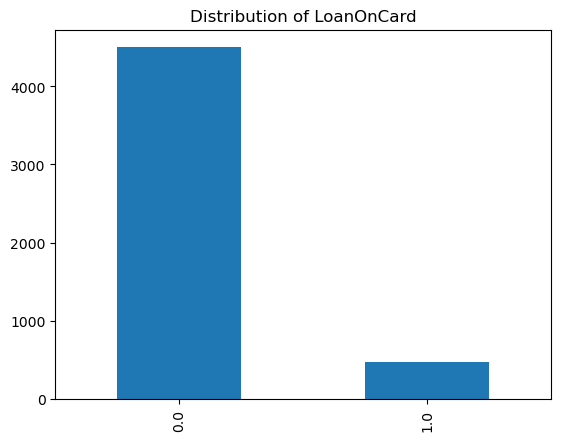

Missing Percentage:
 ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64
Logistic Regression Model Evaluation Metrics:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1116
         1.0       0.85      0.66      0.74       134

    accuracy                           0.95      1250
   macro avg       0.91      0.82      0.86      1250
weighted avg       0.95      0.95      0.95      1250

Confusion Matrix:
 [[1101   15]
 [  46   88]]
Logistic Regression Model on Balanced Data Evaluation Metrics:
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94    

In [10]:
#PART B:-
# Import necessary libraries
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler  # Add this import
from sklearn.exceptions import UndefinedMetricWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Task 1: Data Understanding and Preparation
# A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables.
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')

# B. Print shape and Column Names and DataTypes of both the Dataframes.

print("Data1 Shape:", data1.shape)
print("Data1 Columns and DataTypes:", data1.dtypes)

print("\nData2 Shape:", data2.shape)
print("Data2 Columns and DataTypes:", data2.dtypes)

# C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame
merged_data = pd.merge(data1, data2, on='ID')

# D. Change Datatype of below features to ‘Object’ [1 Marks]
object_features = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
merged_data[object_features] = merged_data[object_features].astype('object')

# Task 2: Data Exploration and Analysis
# A. Visualize distribution of Target variable 'LoanOnCard'
merged_data['LoanOnCard'].value_counts().plot(kind='bar')
plt.title('Distribution of LoanOnCard')
plt.show()

# B. Check percentage of missing values and impute if required
missing_percentage = merged_data.isnull().mean() * 100
print("Missing Percentage:\n", missing_percentage)

# C. Check for unexpected values in each categorical variable and impute
unexpected_values = ['?', 'a', 1.5]
for feature in object_features:
    merged_data[feature] = merged_data[feature].replace(unexpected_values, merged_data[feature].mode()[0])

# Task 3: Data Preparation and model building
# A. Split data into X and Y
X = merged_data.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)
y = merged_data['LoanOnCard']

#  Handling missing values in the target variable
y = y.fillna(0)  # You can choose a suitable strategy for handling missing values in the target variable


# B. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#  Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# C. Train a Supervised Learning Classification base model - Logistic Regression.
model_lr = LogisticRegression(max_iter=2000, solver='saga')
model_lr.fit(X_train_scaled, y_train)

# D. Print evaluation metrics for the model and clearly share insights.
y_pred = model_lr.predict(X_test_scaled)
print("Logistic Regression Model Evaluation Metrics:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# E. Balance the data using the right balancing technique
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# F. Again train the same previous model on balanced data.
model_lr_balanced = LogisticRegression(max_iter=2000, solver='saga')
model_lr_balanced.fit(X_train_resampled, y_train_resampled)

# G. Print evaluation metrics and clearly share differences observed.
y_pred_balanced = model_lr_balanced.predict(X_test_scaled)
print("Logistic Regression Model on Balanced Data Evaluation Metrics:\n", classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

# Task 4: Performance Improvement
# A. Train base models for SVM and KNN
model_svm = SVC()
model_knn = KNeighborsClassifier()

# B. Tune parameters for each model wherever required
# (Note: Hyperparameter tuning is a research-intensive process. Below is a simple example)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(model_svm, param_grid_svm, cv=3)
grid_svm.fit(X_train_resampled, y_train_resampled)

param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(model_knn, param_grid_knn, cv=3)
grid_knn.fit(X_train_resampled, y_train_resampled)

# C. Print evaluation metrics for final models
model_svm_final = grid_svm.best_estimator_
model_knn_final = grid_knn.best_estimator_

y_pred_svm = model_svm_final.predict(X_test)
y_pred_knn = model_knn_final.predict(X_test)

print("SVM Model Evaluation Metrics:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

print("\nKNN Model Evaluation Metrics:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# D. Share improvement achieved from base model to final model
# (Note: Compare the evaluation metrics before and after tuning)


Shape and columns of DataFrame 1:
(100, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Shape and columns of DataFrame 2:
(60, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Shape and columns of DataFrame 3:
(150, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

Column names of DataFrame 1: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Column names of DataFrame 2: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Column names of DataFrame 3: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

DataTypes of DataFrame 1:
P_incidence    float64
P_tilt         float64
L_angle

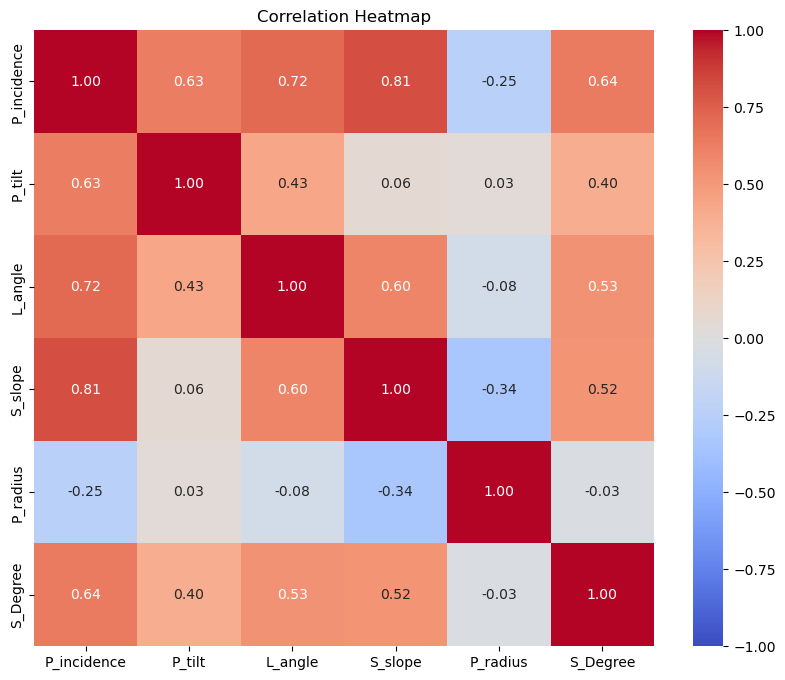

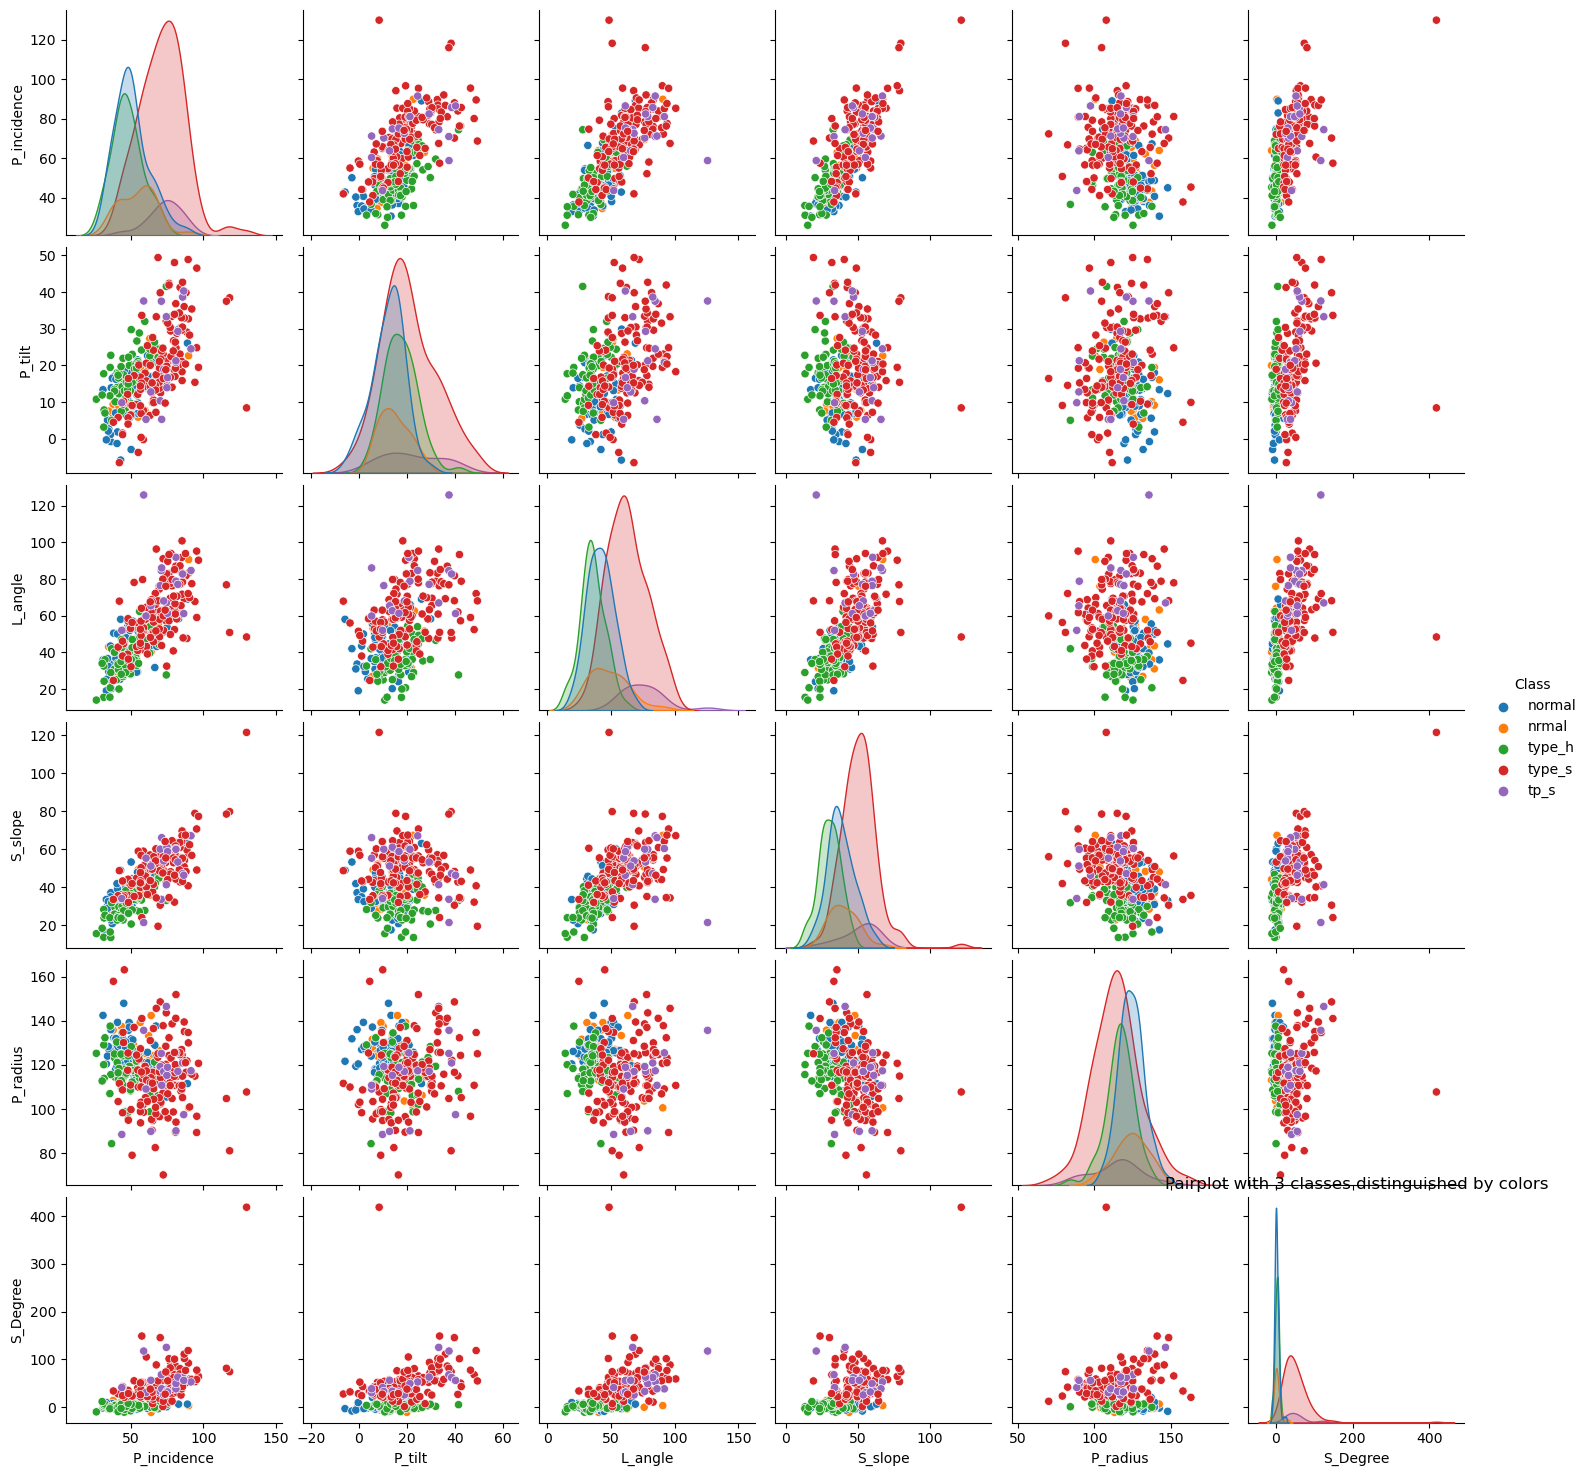

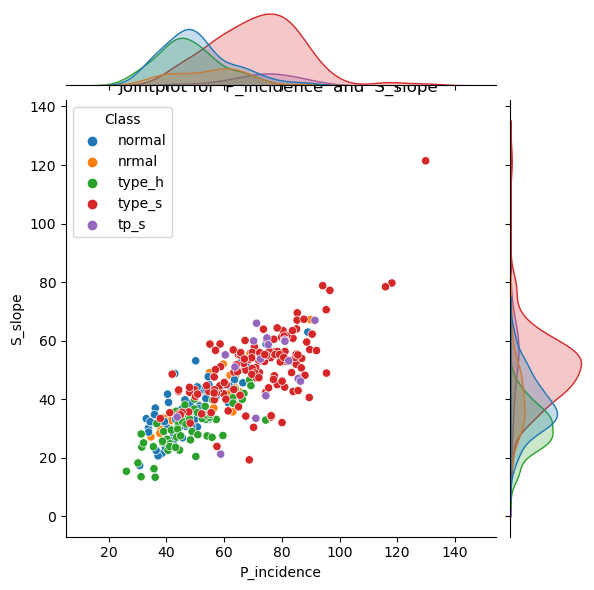

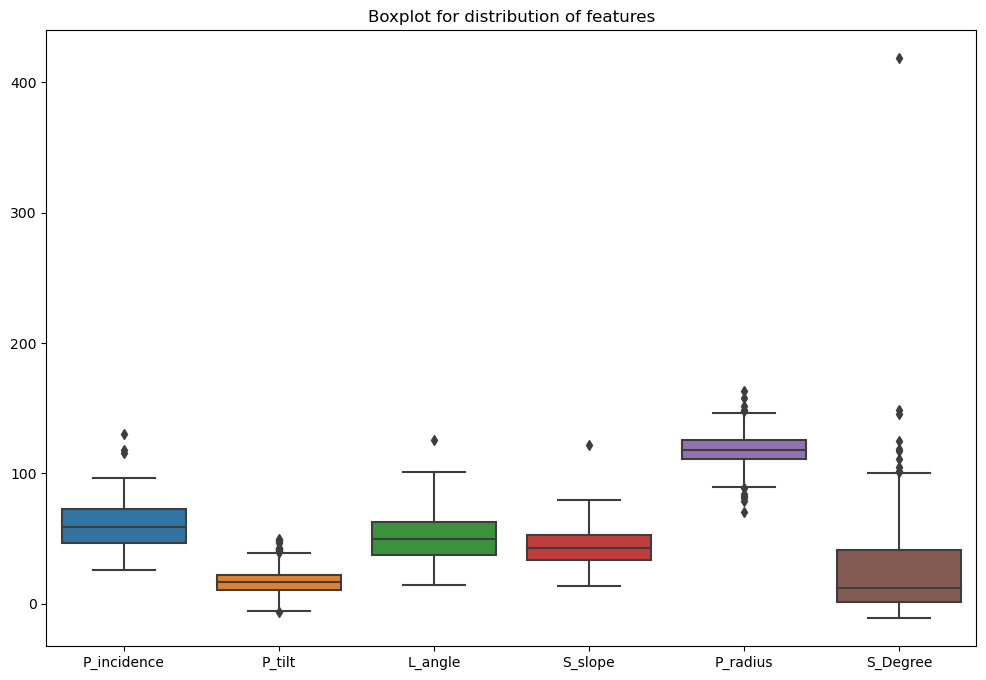


Performance metrics for train data:
Accuracy: 0.8024193548387096
Classification Report:
               precision    recall  f1-score   support

      normal       0.68      0.82      0.74        56
       nrmal       0.57      0.36      0.44        22
        tp_s       1.00      0.27      0.43        11
      type_h       0.74      0.70      0.72        50
      type_s       0.92      0.98      0.95       109

    accuracy                           0.80       248
   macro avg       0.78      0.63      0.66       248
weighted avg       0.80      0.80      0.79       248


Performance metrics for test data:
Accuracy: 0.6612903225806451
Classification Report:
               precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
       nrmal       0.00      0.00      0.00         5
        tp_s       0.00      0.00      0.00         6
      type_h       0.62      0.80      0.70        10
      type_s       0.74      0.83      0.78        24

    ac

In [9]:
#PART A
# Step 1: Data Understanding
import pandas as pd

# A. Read CSV files
df1 = pd.read_csv('Normal.csv')
df2 = pd.read_csv('Type_H.csv')
df3 = pd.read_csv('Type_S.csv')

# B. Print Shape and columns
print("Shape and columns of DataFrame 1:")
print(df1.shape)
print(df1.columns)

print("\nShape and columns of DataFrame 2:")
print(df2.shape)
print(df2.columns)

print("\nShape and columns of DataFrame 3:")
print(df3.shape)
print(df3.columns)

# C. Compare Column names
print("\nColumn names of DataFrame 1:", df1.columns)
print("Column names of DataFrame 2:", df2.columns)
print("Column names of DataFrame 3:", df3.columns)

# D. Print DataTypes
print("\nDataTypes of DataFrame 1:")
print(df1.dtypes)

print("\nDataTypes of DataFrame 2:")
print(df2.dtypes)

print("\nDataTypes of DataFrame 3:")
print(df3.dtypes)

# E. Variation in 'Class' feature
print("\nVariation in 'Class' feature in DataFrame 1:", df1['Class'].unique())
print("Variation in 'Class' feature in DataFrame 2:", df2['Class'].unique())
print("Variation in 'Class' feature in DataFrame 3:", df3['Class'].unique())

# Step 2: Data Preparation and Exploration
# A. Unify 'Class' feature
df1['Class'] = df1['Class'].str.lower()
df2['Class'] = df2['Class'].str.lower()
df3['Class'] = df3['Class'].str.lower()

# B. Combine DataFrames
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# C. Print 5 random samples
print("\n5 random samples of the merged DataFrame:")
print(merged_df.sample(5))

# D. Print Feature-wise percentage of Null values
print("\nFeature-wise percentage of Null values:")
print(merged_df.isnull().mean() * 100)

# E. 5-point summary
print("\n5-point summary of the merged DataFrame:")
print(merged_df.describe())

# Step 3: Data Analysis
# A. Visualize heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_df[numeric_columns].corr()

# Update this line in the heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


# B. Insights on correlation
# - Features having stronger correlation
# - Features having weaker correlation

# C. Visualize pairplot
sns.pairplot(merged_df, hue='Class', diag_kind='kde')
plt.title("Pairplot with 3 classes distinguished by colors")
plt.show()

# D. Visualize jointplot
sns.jointplot(x='P_incidence', y='S_slope', data=merged_df, hue='Class', kind='scatter')
plt.title("Jointplot for 'P_incidence' and 'S_slope'")
plt.show()

# E. Visualize boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df.drop(columns='Class'))
plt.title("Boxplot for distribution of features")
plt.show()

# Step 4: Model Building
# A. Split data into X and Y
X = merged_df.drop(columns='Class')
y = merged_df['Class']

# B. Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# C. Train a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# D. Print performance metrics
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

print("\nPerformance metrics for train data:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

print("\nPerformance metrics for test data:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


In [ ]:
### 5.Performance Improvement

#### 5.A. Experiment with various parameters to improve the performance of the base model.


from sklearn.model_selection import GridSearchCV

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


#### 5.B. Clearly showcase improvement in performance achieved.

# Train a new KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Predictions on the test set using the improved model
improved_test_predictions = best_knn_classifier.predict(X_test)

# Compare the performance metrics with the base model
base_accuracy = accuracy_score(y_test, y_pred_before_tuning)
improved_accuracy = accuracy_score(y_test, improved_test_predictions)

# Showcase improvement in performance
print("Base Model Accuracy:", base_accuracy)
print("Improved Model Accuracy:", improved_accuracy)

# Calculate improvement percentages
accuracy_improvement = ((improved_accuracy - base_accuracy) / base_accuracy) * 100
print(f"\nAccuracy Improvement: {accuracy_improvement:.2f}%")

# Print other performance metrics if needed
# precision, recall, f1-score, etc.

